# 데이터 불러오기

In [1]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle

import warnings
warnings.filterwarnings('ignore')


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경쟁사이용
competitor = pd.read_csv('../../data/경쟁사이용.txt', encoding='cp949')
display(competitor)
# 고객DEMO
pp_demo = pd.read_pickle("../../DATA_preprocessed/pp_demo.pickle")
display(pp_demo)
# 멤버심 여부
member = pd.read_csv('../../data/멤버십여부.txt', encoding='cp949')
display(member)
# 채널이용
channel = pd.read_csv('../../data/채널이용.txt', encoding='cp949')
display(channel)

# 상금 거래 관련
pp_purprd_prodcl = pd.read_pickle('../../DATA_preprocessed/pp_purprd_prodcl.pickle')
pp_purprd_prodcl

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507
...,...,...,...,...
28154,19375,B,B01,201501
28155,19375,B,B01,201507
28156,19375,C,C03,201511
28157,19376,B,B01,201506


,고객번호,성별,연령대,거주지역
0,1,M,60세이상,서울특별시 강남구
1,2,M,60세이상,경기도
2,3,M,60세이상,서울특별시 은평구
3,4,F,60세이상,서울특별시 노원구
4,5,M,60세이상,경기도
...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구
19379,19380,F,20세~24세,서울특별시 마포구
19380,19381,F,40세~44세,부산광역시
19381,19382,F,45세~49세,부산광역시


,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30
...,...,...,...
8819,19168,C_ONLINEMALL,18
8820,19291,C_ONLINEMALL,1
8821,19312,B_ONLINEMALL,137
8822,19351,C_ONLINEMALL,19


,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437049,18697,C,631324,29,2014,5,30,21,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가
28437050,18697,C,631629,29,2014,7,20,15,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가
28437051,18710,C,1073027,75,2015,1,22,12,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가
28437052,18710,C,1073138,75,2015,1,29,21,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가


# EDA

## 분기 Feature 만들기

In [2]:
# 분기로 데이터 짜르기
cond_2014_1 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']<=3)
cond_2014_2 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>3)&(pp_purprd_prodcl['구매_월']<=6))
cond_2014_3 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>6)&(pp_purprd_prodcl['구매_월']<=9))
cond_2014_4 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>9)&(pp_purprd_prodcl['구매_월']<=12))
cond_2015_1 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']<=3)
cond_2015_2 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>3)&(pp_purprd_prodcl['구매_월']<=6))
cond_2015_3 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>6)&(pp_purprd_prodcl['구매_월']<=9))
cond_2015_4 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>9)&(pp_purprd_prodcl['구매_월']<=12))

pp_purprd_prodcl['분기']=0

pp_purprd_prodcl.loc[cond_2014_1,'분기']='14_1'
pp_purprd_prodcl.loc[cond_2014_2,'분기']='14_2'
pp_purprd_prodcl.loc[cond_2014_3,'분기']='14_3'
pp_purprd_prodcl.loc[cond_2014_4,'분기']='14_4'
pp_purprd_prodcl.loc[cond_2015_1,'분기']='15_1'
pp_purprd_prodcl.loc[cond_2015_2,'분기']='15_2'
pp_purprd_prodcl.loc[cond_2015_3,'분기']='15_3'
pp_purprd_prodcl.loc[cond_2015_4,'분기']='15_4'

pp_purprd_prodcl

,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev,분기
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437049,18697,C,631324,29,2014,5,30,21,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,14_2
28437050,18697,C,631629,29,2014,7,20,15,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,14_3
28437051,18710,C,1073027,75,2015,1,22,12,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,15_1
28437052,18710,C,1073138,75,2015,1,29,21,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,15_1


## 분기별 변동지수 feature 생성 : 총 매출합 기준

### 변동지수 생성 사용자 함수 : 고객별 분기 매출 등급 변화량 지수화 

In [41]:
def var_calculation(df, pp_demo):
# 등급 부여 사용자 정의 함수
    def make_cust_sale_grade(x,y):
        if x > lev_dict[y][7]:
            return 9
        elif x > lev_dict[y][6]:
            return 8
        elif x > lev_dict[y][5]:
            return 7
        elif x > lev_dict[y][4]:
            return 6
        elif x > lev_dict[y][3]:
            return 5
        elif x > lev_dict[y][2]:
            return 4
        elif x > lev_dict[y][1]:
            return 3
        elif x > lev_dict[y][0]:
            return 2
        else:
            return 1
    
# 총구매액(sum), 방문횟수(count), 평균지출액(mean) 기준 선택에 따른 옵션 
    option='sum'
    pp_pv = df.pivot_table(index=['고객번호'],columns=['분기'],values='구매금액',aggfunc=(f'{option}'),fill_value=0)   


# 등급 부여
    # 고객 총구매액 list up 을 위한 각 분위 percentile 기준 값 저장 dictionary
    lev_dict = {}
    for season in ['14_1', '14_2', '14_3', '14_4', '15_1', '15_2', '15_3', '15_4']:
        instance=pp_pv[season]
        lev_list=[]
        for j in [4, 11, 23, 40, 60, 77, 89, 96]:
            lev_list.append(np.percentile(instance,j))
        lev_dict[season] = lev_list
    
    
    # 2014
    pp_pv['14_1_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_1'],'14_1'),axis=1)
    pp_pv['14_2_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_2'],'14_2'),axis=1)
    pp_pv['14_3_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_3'],'14_3'),axis=1)
    pp_pv['14_4_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_4'],'14_4'),axis=1)
    # 2015
    pp_pv['15_1_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_1'],'15_1'),axis=1)
    pp_pv['15_2_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_2'],'15_2'),axis=1)
    pp_pv['15_3_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_3'],'15_3'),axis=1)
    pp_pv['15_4_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_4'],'15_4'),axis=1)
    # display(pp_pv)
    
# 변동지수(변화량)에 가중치 부여 (가중치 최근 분기 일수록 옾은 가중치 부여)
    coeff_var = np.linspace(1,1.5,num=6) # 1부터 0.1씩 증가
    pp_pv['15_3분기_변동지수'] = (pp_pv['14_2_등급']-pp_pv['14_1_등급'])*coeff_var[0] +\
                            (pp_pv['14_3_등급']-pp_pv['14_2_등급'])*coeff_var[1] +\
                            (pp_pv['14_4_등급']-pp_pv['14_3_등급'])*coeff_var[2] +\
                            (pp_pv['15_1_등급']-pp_pv['14_4_등급'])*coeff_var[3] +\
                            (pp_pv['15_2_등급']-pp_pv['15_1_등급'])*coeff_var[4] +\
                            (pp_pv['15_3_등급']-pp_pv['15_2_등급'])*coeff_var[5]

    pp_pv['15_4분기_변동지수'] = (pp_pv['14_3_등급']-pp_pv['14_2_등급'])*coeff_var[0] +\
                            (pp_pv['14_4_등급']-pp_pv['14_3_등급'])*coeff_var[1] +\
                            (pp_pv['15_1_등급']-pp_pv['14_4_등급'])*coeff_var[2] +\
                            (pp_pv['15_2_등급']-pp_pv['15_1_등급'])*coeff_var[3] +\
                            (pp_pv['15_3_등급']-pp_pv['15_2_등급'])*coeff_var[4] +\
                            (pp_pv['15_4_등급']-pp_pv['15_3_등급'])*coeff_var[5]

    pp_pv.drop(columns=['14_1', '14_2', '14_3', '14_4', '15_1', '15_2', '15_3', '15_4'],inplace=True)
    
# 고객 Demo Data -> One-Hot 인코딩
    pp_demo = pd.get_dummies(pp_demo)
# Merge
    df = pd.merge(pp_demo, pp_pv, on='고객번호')
    return df

final_pp_purprd_prodcl = var_calculation(pp_purprd_prodcl, pp_demo)
# final_pp_purprd_prodcl

### 구매 감소 고객 이진 분류를 위한 변동 지수 기준 정하기

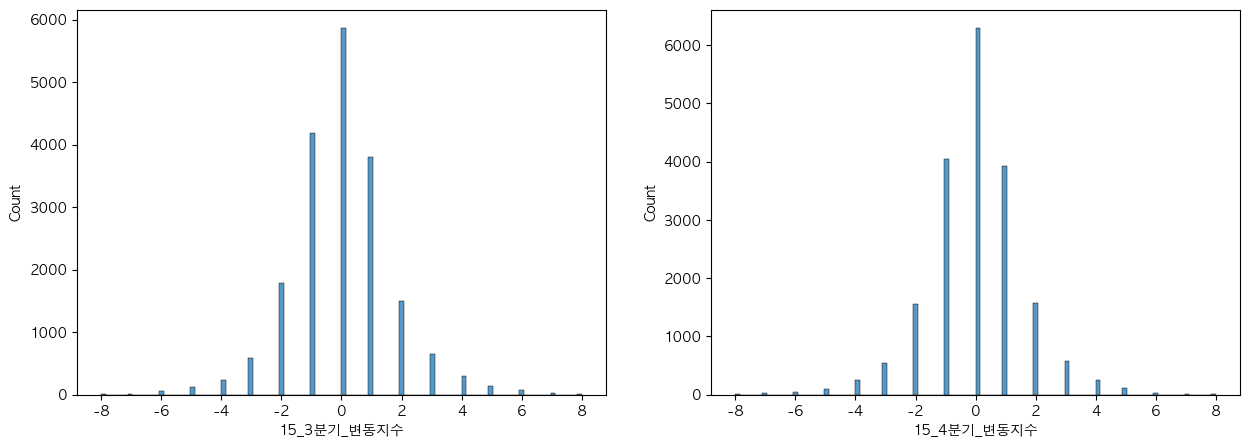

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(final_pp_purprd_prodcl['15_3분기_변동지수'])
plt.subplot(1,2,2)
sns.histplot(final_pp_purprd_prodcl['15_4분기_변동지수'])
plt.show()

## 변동지수 -> 구매 감소 고객 이진 분류 정의

In [43]:
def get_pp_cust(df):
    final_df = var_calculation(df, pp_demo)

    # 구매 감소 고객(Reduced purchases by customers) 정의
    def find_RP_by_cus(x):
        if x < 0:
            return 1 # 감소
        else:
            return 0 # 증가
    final_df['15_3분기_변동지수'] = final_df['15_3분기_변동지수'].apply(find_RP_by_cus)
    final_df['15_4분기_변동지수'] = final_df['15_4분기_변동지수'].apply(find_RP_by_cus)
    
    
    return final_df

final_pp_purprd_prodcl = get_pp_cust(pp_purprd_prodcl)
final_pp_purprd_prodcl

,고객번호,성별_F,성별_M,연령대_19세이하,연령대_20세~24세,연령대_25세~29세,연령대_30세~34세,연령대_35세~39세,연령대_40세~44세,연령대_45세~49세,...,14_1_등급,14_2_등급,14_3_등급,14_4_등급,15_1_등급,15_2_등급,15_3_등급,15_4_등급,15_3분기_변동지수,15_4분기_변동지수
0,1,0,1,0,0,0,0,0,0,0,...,8,8,8,9,8,8,8,7,0,1
1,2,0,1,0,0,0,0,0,0,0,...,9,8,9,7,9,8,9,8,0,0
2,3,0,1,0,0,0,0,0,0,0,...,2,2,2,1,1,1,1,1,1,1
3,4,1,0,0,0,0,0,0,0,0,...,4,6,6,5,5,5,5,4,0,1
4,5,0,1,0,0,0,0,0,0,0,...,6,5,5,1,5,2,1,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,1,0,0,1,0,0,0,0,0,...,1,1,1,3,3,4,2,4,0,0
19379,19380,1,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,5,0,0
19380,19381,1,0,0,0,0,0,0,1,0,...,1,1,1,1,3,4,5,4,0,0
19381,19382,1,0,0,0,0,0,0,0,1,...,1,1,1,1,2,3,4,4,0,0


## 머신러닝 예측

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### 평가 결과 출력 사용자 함수

In [45]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [46]:
get_pp_cust(pp_purprd_prodcl)['15_3분기_변동지수'].value_counts()

0    12393
1     6990
Name: 15_3분기_변동지수, dtype: int64

### 머신러닝 예측

In [47]:
def ml_by_filter():
    # for filter_ in filters:
        # df=pp_purprd_prodcl[pp_purprd_prodcl['대분류명']==filter_]
    df = pp_purprd_prodcl

    final_df = get_pp_cust(df)
    display(final_df)
    print()
    X_train = final_df.drop(['15_3분기_변동지수','15_4분기_변동지수','15_3_등급','15_4_등급'], axis=1)
    y_train = final_df['15_3분기_변동지수']

    X_test = final_df.drop(['15_3분기_변동지수','15_4분기_변동지수','14_1_등급','15_4_등급'], axis=1)
    y_test = final_df['15_4분기_변동지수']
    
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    lr_clf = LogisticRegression(solver='liblinear')
    lr_clf.fit(X_train , y_train)
    pred = lr_clf.predict(X_test)
    pred_proba = lr_clf.predict_proba(X_test)[:, 1]

    get_clf_eval(y_test , pred, pred_proba)
    return 0

ml_by_filter()

,고객번호,성별_F,성별_M,연령대_19세이하,연령대_20세~24세,연령대_25세~29세,연령대_30세~34세,연령대_35세~39세,연령대_40세~44세,연령대_45세~49세,...,14_1_등급,14_2_등급,14_3_등급,14_4_등급,15_1_등급,15_2_등급,15_3_등급,15_4_등급,15_3분기_변동지수,15_4분기_변동지수
0,1,0,1,0,0,0,0,0,0,0,...,8,8,8,9,8,8,8,7,0,1
1,2,0,1,0,0,0,0,0,0,0,...,9,8,9,7,9,8,9,8,0,0
2,3,0,1,0,0,0,0,0,0,0,...,2,2,2,1,1,1,1,1,1,1
3,4,1,0,0,0,0,0,0,0,0,...,4,6,6,5,5,5,5,4,0,1
4,5,0,1,0,0,0,0,0,0,0,...,6,5,5,1,5,2,1,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,1,0,0,1,0,0,0,0,0,...,1,1,1,3,3,4,2,4,0,0
19379,19380,1,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,5,0,0
19380,19381,1,0,0,0,0,0,0,1,0,...,1,1,1,1,3,4,5,4,0,0
19381,19382,1,0,0,0,0,0,0,0,1,...,1,1,1,1,2,3,4,4,0,0



오차 행렬
[[11141  1663]
 [ 2603  3976]]
정확도: 0.7799, 정밀도: 0.7051, 재현율: 0.6043,          F1: 0.6508, AUC:0.8377


0

In [48]:
from sklearn.ensemble import RandomForestRegressor

df = pp_purprd_prodcl
final_df = get_pp_cust(df)

X_train = final_df.drop(['15_3분기_변동지수','15_4분기_변동지수','15_3_등급','15_4_등급'], axis=1)
y_train = final_df['15_3분기_변동지수']

X_test = final_df.drop(['15_3분기_변동지수','15_4분기_변동지수','14_1_등급','15_4_등급'], axis=1)
y_test = final_df['15_4분기_변동지수']


# dt = DecisionTreeRegressor()
# dt.fit(X_train, y_train)
# pred = rf.predict(X_test)
# # pred_proba = rf.predict_proba(X_test)[:, 1]

# get_clf_eval(y_test , pred)#, pred_proba)

In [ ]:
final_df

In [49]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, 
                         tgt_train=None, tgt_test=None):
    model.fit(ftr_train,tgt_train)
    pred=model.predict(ftr_test)
    pred_proba=model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba)

In [50]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
                         boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, 
                     tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[10619  2185]
 [ 2608  3971]]
정확도: 0.7527, 정밀도: 0.6451, 재현율: 0.6036,          F1: 0.6236, AUC:0.8064


In [51]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=1000, n_jobs=-1 )
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_test, 
                     tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[10515  2289]
 [ 2601  3978]]
정확도: 0.7477, 정밀도: 0.6348, 재현율: 0.6047,          F1: 0.6193, AUC:0.7991


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
dt_model.fit(X_train,y_train)
lr_model.fit(X_train,y_train)
rf_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)[:,1]
lr_pred_proba = lr_model.predict_proba(X_test)[:,1]
rf_pred_proba = rf_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test , dt_pred, dt_pred_proba)
get_clf_eval(y_test , lr_pred, lr_pred_proba)
get_clf_eval(y_test , rf_pred, rf_pred_proba)

오차 행렬
[[9844 2960]
 [2788 3791]]
정확도: 0.7035, 정밀도: 0.5615, 재현율: 0.5762,          F1: 0.5688, AUC:0.6725
오차 행렬
[[11043  1761]
 [ 2565  4014]]
정확도: 0.7768, 정밀도: 0.6951, 재현율: 0.6101,          F1: 0.6498, AUC:0.8323
오차 행렬
[[10975  1829]
 [ 2702  3877]]
정확도: 0.7662, 정밀도: 0.6795, 재현율: 0.5893,          F1: 0.6312, AUC:0.8133
